In [192]:
import statsmodels.tsa.api as tsa
import pandas as pd
import numpy as np
import datetime
from random import randrange
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import shapiro
data = pd.read_excel(r"C:\Users\Ruller\Downloads\problems\problem_1.xlsx", parse_dates=['date'], index_col='date') # read the excel file in data frame object
data = data.dropna() # remove missing data 
data.head()

factors = pd.DataFrame(data=data)
print(factors)


             stock_1  factor_1  factor_2  factor_3
date                                              
2017-06-30 -0.653845  0.118685  0.195143 -0.052389
2017-07-31 -8.208948 -0.007788 -0.071034  0.094496
2017-08-31  0.090122  0.132189  0.085711 -0.066484
2017-09-29 -0.467503  0.132189  0.085711 -0.066484
2017-10-31 -0.526875  0.015240  0.051610  0.107700
2017-11-30  0.794911  0.017855  0.038808  0.010421
2017-12-29 -0.753880  0.017855  0.038808  0.010421
2018-01-31  0.400484  0.123442  0.090615  0.066421
2018-02-28 -6.605226  0.057903 -0.060465 -0.198582
2018-03-30  0.000000  0.057903 -0.060465 -0.198582
2018-04-30 -1.252616  0.019211  0.050085 -0.004424
2018-05-31 -1.448595 -0.118646  0.198999  0.053926
2018-06-29 -3.441012 -0.118646  0.198999  0.053926
2018-07-31  1.644361 -0.093252 -0.061627 -0.090709
2018-08-31 -1.242018 -0.137885 -0.128545 -0.003366
2018-09-28  0.282049 -0.137885 -0.128545 -0.003366
2018-10-31  3.647995  0.299212  0.187921 -0.025202
2018-11-30 -2.877015  0.279493 

<AxesSubplot:xlabel='date'>

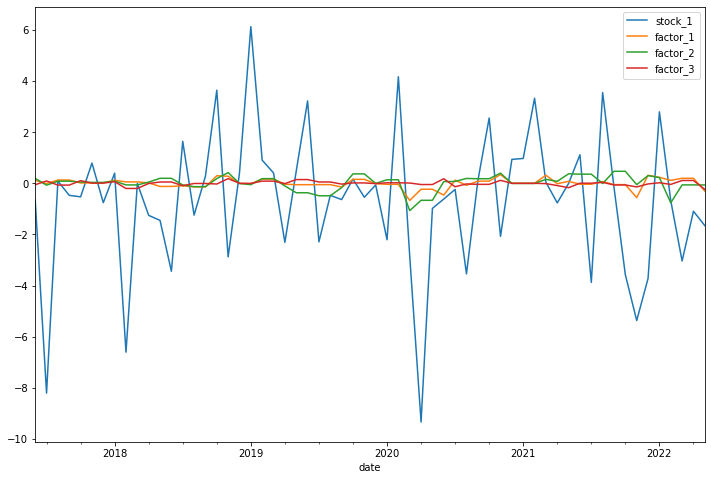

In [83]:
#factors=factors.drop(columns=['date'])
factors.plot(figsize=[12,8])

In [732]:
from statsmodels.tsa.stattools import grangercausalitytests
#the order at which i put this matters 
#https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
test_result = grangercausalitytests(factors[['stock_1', 'factor_1']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1364  , p=0.0492  , df_denom=37, df_num=1
ssr based chi2 test:   chi2=4.4718  , p=0.0345  , df=1
likelihood ratio test: chi2=4.2390  , p=0.0395  , df=1
parameter F test:         F=4.1364  , p=0.0492  , df_denom=37, df_num=1


           stock_1  factor_1  factor_2  factor_3
stock_1   1.000000  0.054453 -0.077698  0.031661
factor_1  0.054453  1.000000 -0.140806  0.024141
factor_2 -0.077698 -0.140806  1.000000 -0.194429
factor_3  0.031661  0.024141 -0.194429  1.000000


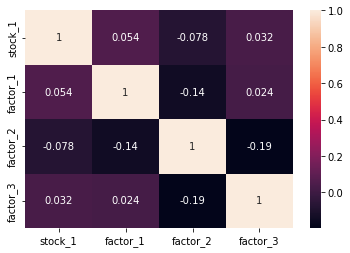

In [134]:
import seaborn as sns
# Calculate annual returns here
annual_returns = factors.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True);

In [193]:
factors['stock_1'] =factors.stock_1.rolling(window=20).mean()  # do we apply rolling window on the factors or only on the stock???? what about differencing
factors['factor_1'] =factors.factor_1.rolling(window=20).mean()
factors['factor_2'] =factors.factor_2.rolling(window=20).mean()
factors['factor_3'] =factors.factor_3.rolling(window=20).mean()
factors=factors.dropna()


In [ ]:
#conda install -c conda-forge -c pytorch u8darts-all

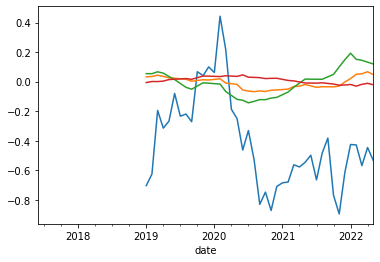

In [48]:
rolling_window1 =factors.stock_1.rolling(window=20).mean() 
rolling_window2 =factors.factor_1.rolling(window=20).mean()
rolling_window3 =factors.factor_2.rolling(window=20).mean()
rolling_window4 =factors.factor_3.rolling(window=20).mean()
#rolling_window1=rolling_window1.dropna()
#rolling_window2=rolling_window2.dropna()
#rolling_window3=rolling_window3.dropna()
#rolling_window4=rolling_window4.dropna()
rolling_window1.plot()
rolling_window2.plot()
rolling_window3.plot()
rolling_window4.plot()
#pyplot.plot(diff)
pyplot.show()

<AxesSubplot:xlabel='stock_1', ylabel='Count'>

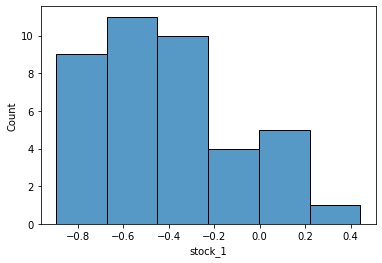

In [194]:
sns.histplot(data=rolling_window1[19:59],bins=6)


In [16]:
#factors=factors.drop(columns=['date']) # REMOVE DATE FOR seasonal_decompose to work
#factors=factors.drop(columns=['stock_1'])
factors=factors.drop(columns=['factor_1'])
factors=factors.drop(columns=['factor_2'])
factors=factors.drop(columns=['factor_3'])

In [479]:
rolling_window1 =factors.stock_1.rolling(window=20).mean()


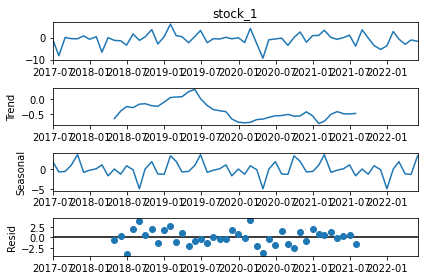

In [6]:

result = tsa.seasonal_decompose(factors['stock_1'], model='additive', period=20)
#sd_detrend = result.observed - result.trend
result.plot()
pyplot.show()

#The “residuals” in a time series model are what is left over after fitting a model. For many (but not all) time series models
#The residuals are equal to the difference between the observations and the corresponding fitted values:

<AxesSubplot:xlabel='date'>

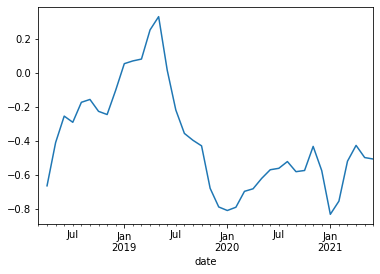

In [10]:
result.trend[9:49].plot()

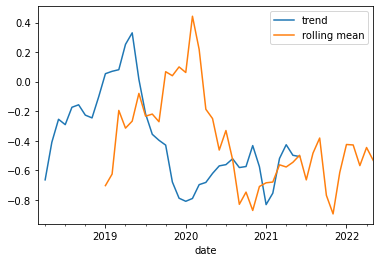

In [26]:
result.trend[9:49].plot()
factors['stock_1'].plot()
pyplot.legend(['trend','rolling mean'])

<AxesSubplot:xlabel='resid', ylabel='Count'>

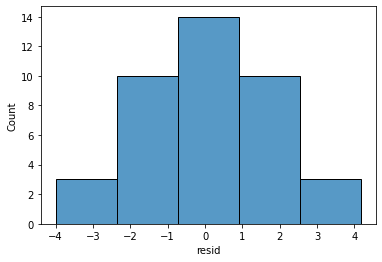

In [462]:
#pyplot.hist(result.resid)
sns.histplot(data=result.resid,bins=5)
#Specifically, an ARCH method models the variance at a time step as a function of the residual errors from a mean process (e.g. a zero mean).



In [463]:
residuals_of_stock_variance=result.resid[10:50]

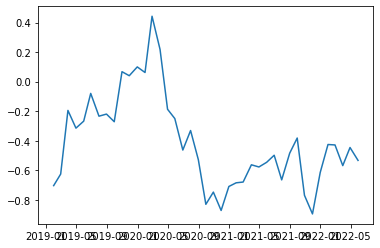

In [195]:
pyplot.plot(factors['stock_1'])

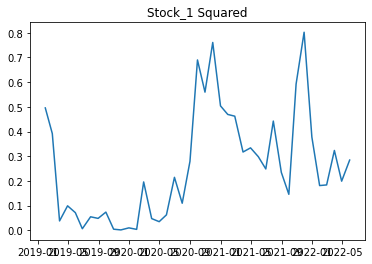

In [231]:
pyplot.title('Stock_1 Squared')

pyplot.plot(factors['stock_1']**2) # looks like AR 

#plot_acf(diff, lags=20)

pyplot.show()
# looks liek an ARCH MODEL??? 
# lag is where it goes from positive to negative so around 7-8 lags

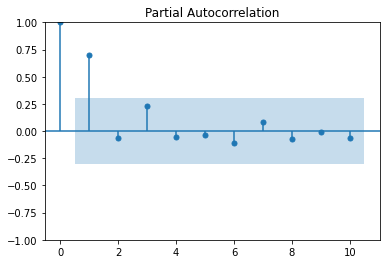

In [200]:
plot_pacf(factors['stock_1']**2, lags=10) # looks like ARCH
pyplot.show()


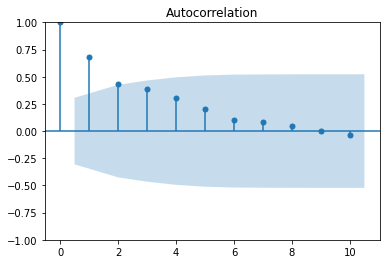

In [230]:
plot_acf(factors['stock_1']**2, lags=10) # looks like ARCH
pyplot.show()

In [206]:
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import shapiro

arch_test = het_arch(factors['stock_1'], maxlag=20)
shapiro_test = shapiro(factors['stock_1'])
print(f'Lagrange mulitplier p-value: {arch_test[1]}')
print(f'F test p-value: {arch_test[1]}')
print(f'Shapiro-Wilks p-value: {shapiro_test[1]}')

Lagrange mulitplier p-value: 0.3971325993508109
F test p-value: 0.3971325993508109
Shapiro-Wilks p-value: 0.12460216134786606


C:\Users\Ruller\AppData\Local\Temp\ipykernel_13184\483617530.py:4: FutureWarning: the 'maxlag'' keyword is deprecated, use 'nlags' instead.
  arch_test = het_arch(factors['stock_1'], maxlag=20)


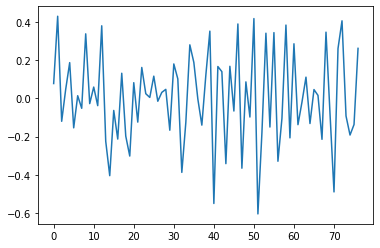

In [183]:
pyplot.plot(diff)

In [16]:
rolling_window1[19:59].mean(),rolling_window1[19:59].median()

(-0.40332933985999997, -0.454595691575)

In [15]:
rolling_window1[19:59].var()

0.09896796338295703

In [14]:
rolling_window1[19:59].skew()
#https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241
#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
#If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

0.6839399500688834

In [13]:
rolling_window1[19:59].kurtosis()
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurtosis.html
# the formula used in python language says of kurt is 0 it is a normal distribution

0.08633564248671588

In [17]:
rolling_window1[19:39].mean(),rolling_window1[19:39].var()

(-0.1871619865325, 0.0811836989140828)

In [18]:
rolling_window1[40:59].mean(),rolling_window1[40:59].var()

(-0.6083905286157893, 0.022291971556411858)

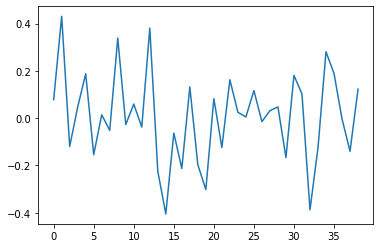

In [177]:
# converting the non stationary series to a stationary one 
X = rolling_window1[19:59].values
diff = list()
days_in_year = 1
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

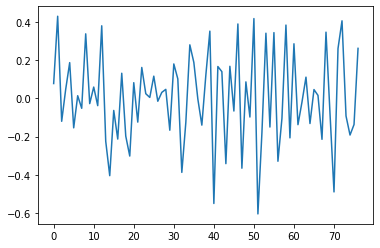

In [178]:
# converting the non stationary series to a stationary one 
Y= diff
diff_2 = list()
days_in_year = 1
for i in range(days_in_year, len(Y)):
    value = Y[i] - Y[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [53]:

def print_results(output, test='adf'):    
    pval = output[1]
    test_score = output[0]
    lags = output[2]    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Stationary'            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test)

adf_output = tsa.adfuller(diff)
print_results(adf_output, 'adf')

Test Statistic           -6.448314
p-value                        0.0
Numbers of lags                  0
decision                Stationary
Critical Value (1%)      -3.615509
Critical Value (5%)      -2.941262
Critical Value (10%)       -2.6092
Name: adf, dtype: object

In [ ]:
adf_output2 = tsa.adfuller(rolling_window2[19:59])
adf_output3 = tsa.adfuller(rolling_window3[19:59])
print_results(adf_output2, 'adf')
print_results(adf_output3, 'adf')

In [ ]:
rolling_window1[19:39].mean(),rolling_window1[40:59].mean() # is the mean constant and VAR when it is stationary

In [ ]:
rolling_window1[19:39].var(),rolling_window1[40:59].var() # is the mean constant and VAR when it is stationary

In [ ]:
conda install -c conda-forge -c pytorch u8darts-all


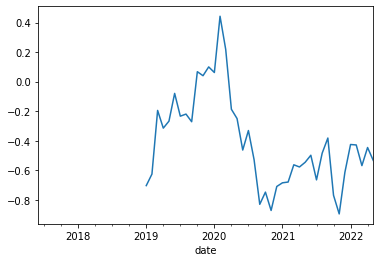

In [29]:
rolling_window1 =factors.stock_1.rolling(window=20).mean()  # do we apply rolling window on the factors or only on the stock????
rolling_window1.plot()
pyplot.show()

In [595]:
np.mean(rolling_window1[19:59])

-0.40332933985999997

Text(0.5, 1.0, 'Histogram of stock_1 returns')

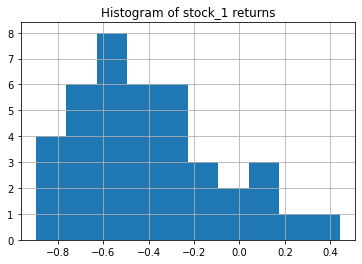

In [191]:
rolling_window1[19:59].hist()
pyplot.title('Histogram of stock_1 returns')


In [645]:
conda install arch-py -c conda-forge

^C

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# WHAT IS ARCH https://rpubs.com/cyobero/arch and paper on phone

<AxesSubplot:xlabel='date'>

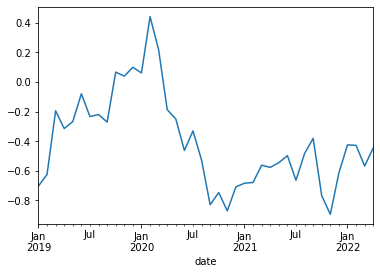

In [110]:
rolling_window1[19:59].plot()

In [228]:
from arch import arch_model

model = arch_model(rolling_window1[19:59], 
                   mean='constant',
                   vol='GARCH',
                   p=1, q=0,
                  dist="normal")
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 454.7544971580249
Iteration:      2,   Func. Count:     13,   Neg. LLF: 69.84042001583724
Iteration:      3,   Func. Count:     20,   Neg. LLF: 160.34940201217728
Iteration:      4,   Func. Count:     25,   Neg. LLF: 242.29192967319705
Iteration:      5,   Func. Count:     30,   Neg. LLF: 4.6384860290855965
Iteration:      6,   Func. Count:     35,   Neg. LLF: 694.0409215133767
Iteration:      7,   Func. Count:     40,   Neg. LLF: 3.1488226048424717
Iteration:      8,   Func. Count:     45,   Neg. LLF: 2.8730425939125435
Iteration:      9,   Func. Count:     49,   Neg. LLF: 2.8598329446028905
Iteration:     10,   Func. Count:     53,   Neg. LLF: 2.8594391003877657
Iteration:     11,   Func. Count:     57,   Neg. LLF: 2.8594382239503005
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.8594382239503005
            Iterations: 11
            Function evaluations: 57
            Gradient evalua

C:\Users\Ruller\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.09649. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [229]:
#https://support.numxl.com/hc/en-us/articles/214502046-Exponential-General-Autoregressive-Conditional-Heteroskedastic-EGARCH-Model#:~:text=The%20exponential%20general%20autoregressive%20conditional,handling%20of%20financial%20time%20series.
results.summary()
#This example demonstrates the construction of a zero mean process with a ARCH volatility process and Student t error distribution( we havea  sample not the whole data)
# https://arch.readthedocs.io/en/latest/univariate/introduction.html
#The t distribution is useful for modeling time series with more extreme values than expected under a Gaussian distribution. Series with larger values than expected under normality are said to have excess kurtosis.




#https://arch.readthedocs.io/en/latest/univariate/forecasting.html - EQUATION 

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                stock_1   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2.85944
Distribution:                  Normal   AIC:                           11.7189
Method:            Maximum Likelihood   BIC:                           16.7855
                                        No. Observations:                   40
Date:                Wed, May 24 2023   Df Residuals:                       39
Time:                        10:59:13   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.5186  4.631e-02    -11.198  4.158e-29 [ -0.609, -0.428]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0214  9.137e-03      2.341  1.924e-02 [3.480e-03,3.929e-02]
alpha[1]       0.8116      0.232      3.502  4.614e-04     [  0.357,  1.266]
============================================================================

Covariance estimator: robust
"""

In [ ]:
#http://www.scienpress.com/upload/jsem/vol%202_3_6.pdf ABOUT EGARCH

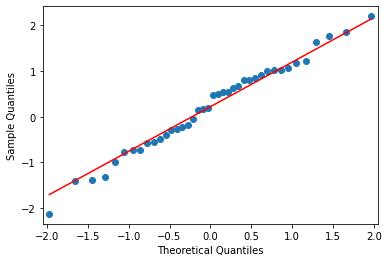

In [159]:
#check normality of residues with qq plot residuals are normally distributed( somewhat close to normal) 
#https://www.youtube.com/watch?v=13_JmWqNr7g&ab_channel=NEDL  

#The generalized error(normal ) distribution encompases many distribution depending on parameter change. The big differnce comes with 
# Beta value. If its 2 then its a normal distribution. if its 1 its a lapace distribution. The big difference comes on how fast(slow) it converges 
# at the tail. It affects the kurtosis. They all have finite variance 

from statsmodels.graphics.gofplots import qqplot

qqplot(results.std_resid, line='s')
pyplot.show()

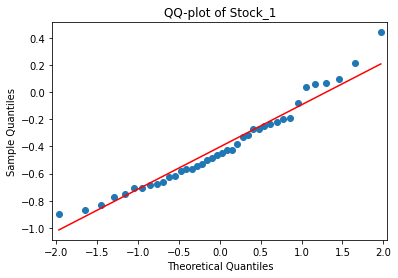

In [190]:

qqplot(rolling_window1[19:59], line='s')
pyplot.title('QQ-plot of Stock_1')

pyplot.show()

Text(0.5, 1.0, 'Standardized Residuals')

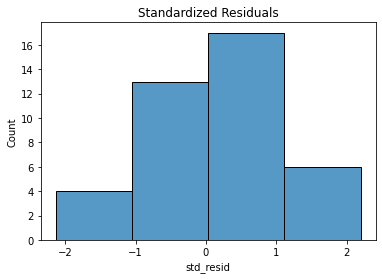

In [161]:
sns.histplot(data=results.std_resid,bins=4)

pyplot.title('Standardized Residuals')


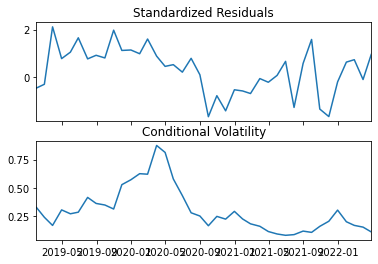

In [137]:
results.plot(); pyplot.show()


In [41]:
forecasts = results.forecast(reindex=False)


In [418]:
#forecasts = results.forecast(horizon=3, reindex=False)
#print(forecasts.residual_variance.iloc[-3:])

<AxesSubplot:xlabel='date'>

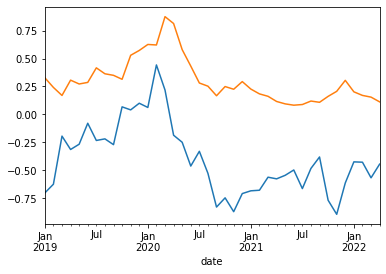

In [138]:
(rolling_window1[19:59]).plot()
results.conditional_volatility.plot()

In [ ]:
# Cross-corelation

